<div align="center">
 <img src="https://mlogu6g7z5ex.i.optimole.com/cb:RF8R~518a6/w:auto/h:auto/q:90/https://facens.br/wp-content/uploads/2021/03/logo-f.png" width="150px">
 <h1> Dataviz - Especialização em Ciência de Dados - FACENS<br><br>
    Trabalho Final
 </h1>
</div>
<br><br>


**Alunos:**

* Andreia Brito Castro Leite - RA: 226019

* Agenor Soares Sampaio Junior - RA: 154109

* Gabriela Siano - RA: 226613

* Silvia - RA:

Completem os nomes por favor =]


## Análise dos dados do conjunto 'Blackfriday.csv'.
Objetivo é desvendar padrões de consumo, identificar tendências e entender as relações entre variáveis-chave durante esse fenômeno de compras, descobrir qual perfil de pessoa mais gasta na black friday e descobrir qual é o tipo de produto mais comprado.


In [ ]:
#Bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
data = pd.read_csv('/content/BlackFriday.csv')
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Tratando a base
print("Dados Faltantes:")
data.isnull().sum().sort_values(ascending=False)

Dados Faltantes:


Product_Category_3            373299
Product_Category_2            166986
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [ ]:
# Substitua os valores ausentes por 0 na coluna 'Product_Category_2'
data['Product_Category_2'] = data['Product_Category_2'].fillna(0)

# Substitua os valores ausentes por 0 na coluna 'Product_Category_3'
data['Product_Category_3'] = data['Product_Category_3'].fillna(0)

print("Dados Faltantes:")
data.isnull().sum().sort_values(ascending=False)


Dados Faltantes:


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [ ]:
# Converter a coluna 'Product_Category_2' em números inteiros
data['Product_Category_2'] = data['Product_Category_2'].astype(int)

# Converter a coluna 'Product_Category_3' em números inteiros
data['Product_Category_3'] = data['Product_Category_3'].astype(int)

# Verificar o tipo de dados após a conversão
print(data.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object


In [ ]:
# Quantidade de registros por faixa etária
# Função value_counts() para calcular a tabela de frequência
tabela_frequencia_idade = data['Age'].value_counts().reset_index()
tabela_frequencia_idade.columns = ['Idade', 'Frequência']
print(tabela_frequencia_idade)

   Idade  Frequência
0  26-35      214690
1  36-45      107499
2  18-25       97634
3  46-50       44526
4  51-55       37618
5    55+       20903
6   0-17       14707


In [ ]:
#Gráfico de registros por idade
data1 = [go.Bar(
            x=tabela_frequencia_idade.Frequência,
            y=tabela_frequencia_idade.Idade,
            orientation='h')]

layout = go.Layout(
    title='Distribuição dos Registros por Faixa Etária',
    xaxis=dict(title='Quantidade de Registros'),
    yaxis=dict(title='Idade')
)

fig = go.Figure(data=data1, layout=layout)

py.iplot(fig)

In [ ]:
# Tabela de frequência por ocupação:
tabela_freq_ocupacao = data['Occupation'].value_counts().reset_index()
tabela_freq_ocupacao.columns = ['Ocupação', 'Frequencia']

tabela_freq_ocupacao = tabela_freq_ocupacao.sort_values(by='Frequencia', ascending=False)

# Tabela de frequência por ocupação em ordem decrescente:
print("Tabela de Frequência por Ocupação (Ordem Decrescente):\n")
print(tabela_freq_ocupacao)

#soma dos registros
print("Soma dos Registros:")
print(tabela_freq_ocupacao['Frequencia'].sum())

Tabela de Frequência por Ocupação (Ordem Decrescente):

    Ocupação  Frequencia
0          4       70862
1          0       68120
2          7       57806
3          1       45971
4         17       39090
5         20       32910
6         12       30423
7         14       26712
8          2       25845
9         16       24790
10         6       19822
11         3       17366
12        10       12623
13         5       11985
14        15       11812
15        11       11338
16        19        8352
17        13        7548
18        18        6525
19         9        6153
20         8        1524
Soma dos Registros:
537577


In [ ]:
#Gráfico da frequência de registros por ocupação
data_ocupacao = [go.Bar(
            x=tabela_freq_ocupacao.Frequencia,
            y=tabela_freq_ocupacao.Ocupação,
            orientation='h')]

layout = go.Layout(
    title='Distribuição dos Registros por Ocupação',
    xaxis=dict(title='Quantidade de Registros'),
    yaxis=dict(title='Ocupação')
)

fig = go.Figure(data=data_ocupacao, layout=layout)

py.iplot(fig)

In [ ]:
total_frequencia = tabela_freq_ocupacao['Frequencia'].sum()

# Os 5 primeiros registros
primeiros_5_registros = tabela_freq_ocupacao.head(5)

# Calcular a soma das frequências dos 5 primeiros registros
soma_dos_5_primeiros = primeiros_5_registros['Frequencia'].sum()

# Calcular a porcentagem em relação ao total
porcentagem_em_relacao_ao_total = (soma_dos_5_primeiros / total_frequencia) * 100

# Imprimir os 5 primeiros registros, a soma das frequências e a porcentagem em relação ao total
print("5 Primeiros Registros da Tabela de Frequência por Ocupação:\n")
print(primeiros_5_registros)

print("\nSoma das Frequências dos 5 Primeiros Registros: ", soma_dos_5_primeiros)
print("Porcentagem em Relação ao Total: {:.2f}%".format(porcentagem_em_relacao_ao_total))

5 Primeiros Registros da Tabela de Frequência por Ocupação:

   Ocupação  Frequencia
0         4       70862
1         0       68120
2         7       57806
3         1       45971
4        17       39090

Soma das Frequências dos 5 Primeiros Registros:  281849
Porcentagem em Relação ao Total: 52.43%


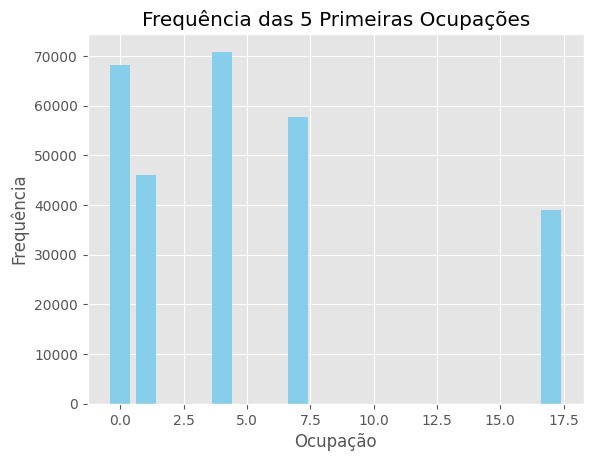

In [ ]:
import matplotlib.pyplot as plt

# Vamos supor que você já tenha a tabela de frequência ordenada em ordem decrescente (tabela_freq_ocupacao).

# Defina o estilo de gráfico
plt.style.use('ggplot')

# Selecione os nomes de ocupação (categorias) e suas frequências dos 5 primeiros registros
categorias = primeiros_5_registros['Ocupação']
frequencias = primeiros_5_registros['Frequencia']

# Crie o gráfico de barras
plt.bar(categorias, frequencias, color='skyblue')

# Adicione rótulos e título
plt.xlabel('Ocupação')
plt.ylabel('Frequência')
plt.title('Frequência das 5 Primeiras Ocupações')

# Exiba o gráfico
plt.show()

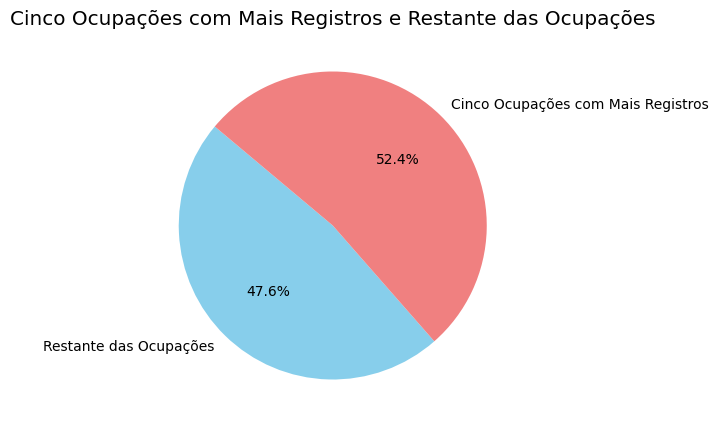

In [ ]:
# Dados
categorias = ['Restante das Ocupações', 'Cinco Ocupações com Mais Registros']
valores = [total_frequencia - soma_dos_5_primeiros, soma_dos_5_primeiros]
cores = ['skyblue', 'lightcoral']

plt.figure(figsize=(10, 5))

# Crie o gráfico de pizza
plt.pie(valores, labels=categorias, colors=cores, autopct='%1.1f%%', startangle=140)

# Adicione título
plt.title('Cinco Ocupações com Mais Registros e Restante das Ocupações')

# Exiba o gráfico
plt.show()

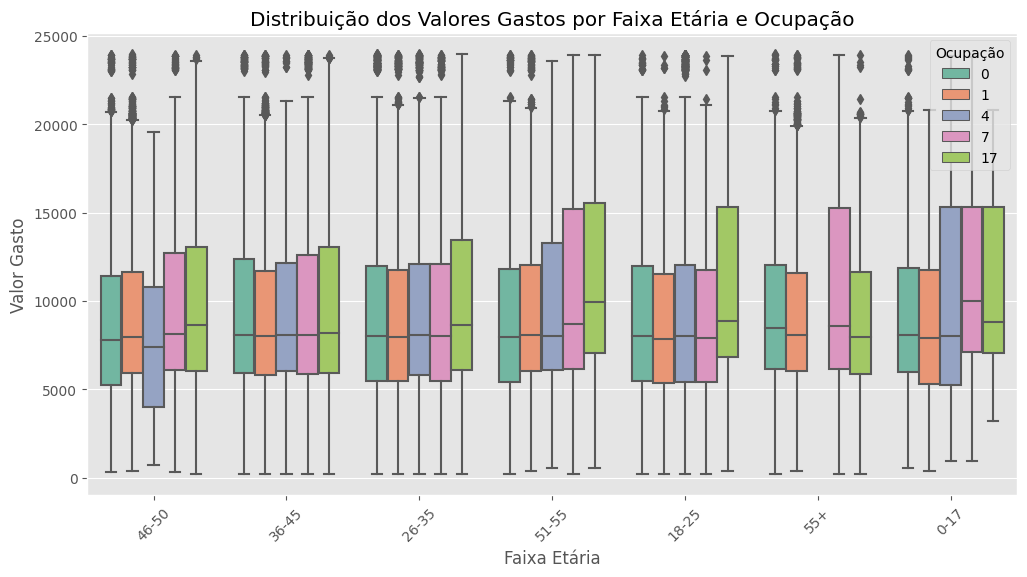

In [ ]:
# Filtro das 5 ocupações mais frequentes
ocupacoes_frequentes = data['Occupation'].value_counts().head(5).index.tolist()
df_filtrado_ocupacao = data[data['Occupation'].isin(ocupacoes_frequentes)]

# Gráfico de caixa para a distribuição dos valores gastos por faixa etária para as 5 ocupações mais frequentes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Purchase', hue='Occupation', data=df_filtrado_ocupacao, palette='Set2')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor Gasto')
plt.title('Distribuição dos Valores Gastos por Faixa Etária e Ocupação')
plt.xticks(rotation=45)
plt.legend(title='Ocupação')
plt.show()

In [ ]:
# Tabela de frequência para 'Product_Category_1'
tabela_freq_categoria_1 = data['Product_Category_1'].value_counts().reset_index()
tabela_freq_categoria_1.columns = ['Product_Category_1', 'Frequencia']

# Imprimir a tabela de frequência para 'Product_Category_1':
print("Tabela de Frequência para Product_Category_1:\n")
print(tabela_freq_categoria_1)

Tabela de Frequência para Product_Category_1:

    Product_Category_1  Frequencia
0                    5      148592
1                    1      138353
2                    8      112132
3                   11       23960
4                    2       23499
5                    6       20164
6                    3       19849
7                    4       11567
8                   16        9697
9                   15        6203
10                  13        5440
11                  10        5032
12                  12        3875
13                   7        3668
14                  18        3075
15                  14        1500
16                  17         567
17                   9         404


In [ ]:
# Filtrando os registros onde 'Product_Category_2' é diferente de zero
# Filtro utilizado, devido à substituição dos valores ausentes por 0
df_filtered = data[data['Product_Category_2'] != 0]

# Tabela de frequência para 'Product_Category_2'
tabela_freq_categoria_2 = df_filtered['Product_Category_2'].value_counts().reset_index()
tabela_freq_categoria_2.columns = ['Product_Category_2', 'Frequencia']


# Tabela de frequência para 'Product_Category_2':
print("\nTabela de Frequência para Product_Category_2:\n")
print(tabela_freq_categoria_2)


Tabela de Frequência para Product_Category_2:

    Product_Category_2  Frequencia
0                    8       63058
1                   14       54158
2                    2       48481
3                   16       42602
4                   15       37317
5                    5       25874
6                    4       25225
7                    6       16251
8                   11       13945
9                   17       13130
10                  13       10369
11                   9        5591
12                  12        5419
13                  10        2991
14                   3        2835
15                  18        2730
16                   7         615


In [ ]:
# Filtrando os registros onde 'Product_Category_2' é diferente de zero
# Filtro utilizado, devido à substituição dos valores ausentes por 0
df_filtered = data[data['Product_Category_3'] != 0]

# Crie uma tabela de frequência para 'Product_Category_3'
tabela_freq_categoria_3 = df_filtered['Product_Category_3'].value_counts().reset_index()
tabela_freq_categoria_3.columns = ['Product_Category_3', 'Frequencia']


# Exemplo de como imprimir a tabela de frequência para 'Product_Category_3':
print("\nTabela de Frequência para Product_Category_3:\n")
print(tabela_freq_categoria_3)


Tabela de Frequência para Product_Category_3:

    Product_Category_3  Frequencia
0                   16       32148
1                   15       27611
2                   14       18121
3                   17       16449
4                    5       16380
5                    8       12384
6                    9       11414
7                   12        9094
8                   13        5385
9                    6        4818
10                  18        4563
11                   4        1840
12                  11        1773
13                  10        1698
14                   3         600


In [ ]:
# Combinação dos DataFrames em um único DataFrame usando merge
combined_df = tabela_freq_categoria_1.merge(tabela_freq_categoria_2, left_on='Product_Category_1', right_on='Product_Category_2')
combined_df = combined_df.merge(tabela_freq_categoria_3, left_on='Product_Category_1', right_on='Product_Category_3')

# Renomear colunas
combined_df.columns = ['Prod1', 'Frequencia_1', 'Prod2', 'Frequencia_2', 'Prod3', 'Frequencia_3']
combined_df

,Prod1,Frequencia_1,Prod2,Frequencia_2,Prod3,Frequencia_3
0,5,148592,5,25874,5,16380
1,8,112132,8,63058,8,12384
2,11,23960,11,13945,11,1773
3,6,20164,6,16251,6,4818
4,3,19849,3,2835,3,600
5,4,11567,4,25225,4,1840
6,16,9697,16,42602,16,32148
7,15,6203,15,37317,15,27611
8,13,5440,13,10369,13,5385
9,10,5032,10,2991,10,1698


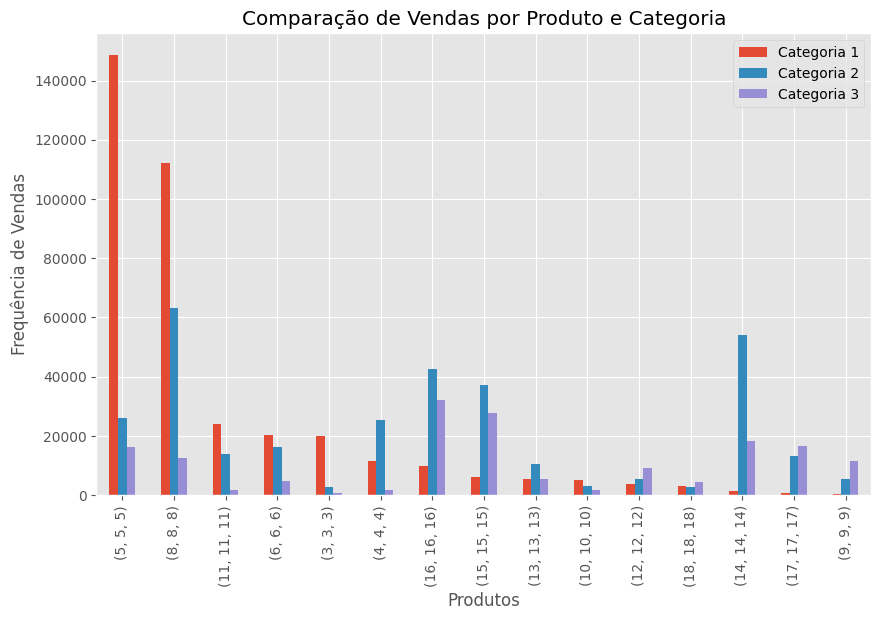

In [ ]:
# Comparando vendas por produto, como índice para facilitar a criação do gráfico
combined_df.set_index(['Prod1', 'Prod2', 'Prod3'], inplace=True)

# Plotar um gráfico de barras para comparar as frequências
combined_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Produtos')
plt.ylabel('Frequência de Vendas')
plt.title('Comparação de Vendas por Produto e Categoria')
plt.legend(["Categoria 1", "Categoria 2", "Categoria 3"])
plt.show()

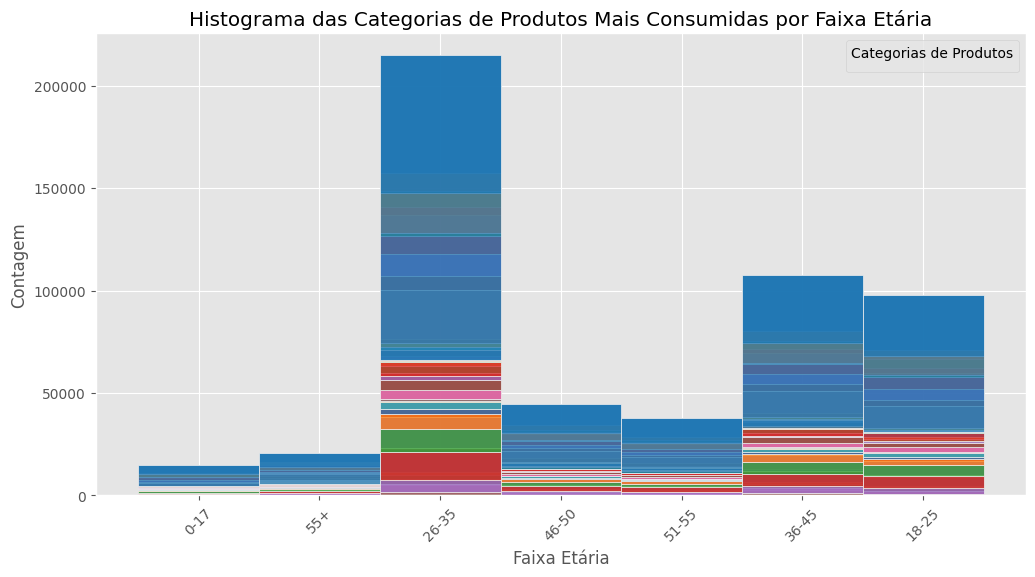

In [ ]:
# Crie um histograma das categorias de produtos mais consumidas por faixa etária
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Product_Category_1', multiple='stack', bins=10, palette='tab10')
sns.histplot(data=data, x='Age', hue='Product_Category_2', multiple='stack', bins=10, palette='tab10')
sns.histplot(data=data, x='Age', hue='Product_Category_3', multiple='stack', bins=10, palette='tab10')

# Personalize o gráfico
plt.title('Histograma das Categorias de Produtos Mais Consumidas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.legend(title='Categorias de Produtos')
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()

<ipython-input-30-17bed02526c4>:7: UserWarning:


The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.

<ipython-input-30-17bed02526c4>:8: UserWarning:


The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.

<ipython-input-30-17bed02526c4>:9: UserWarning:


The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.



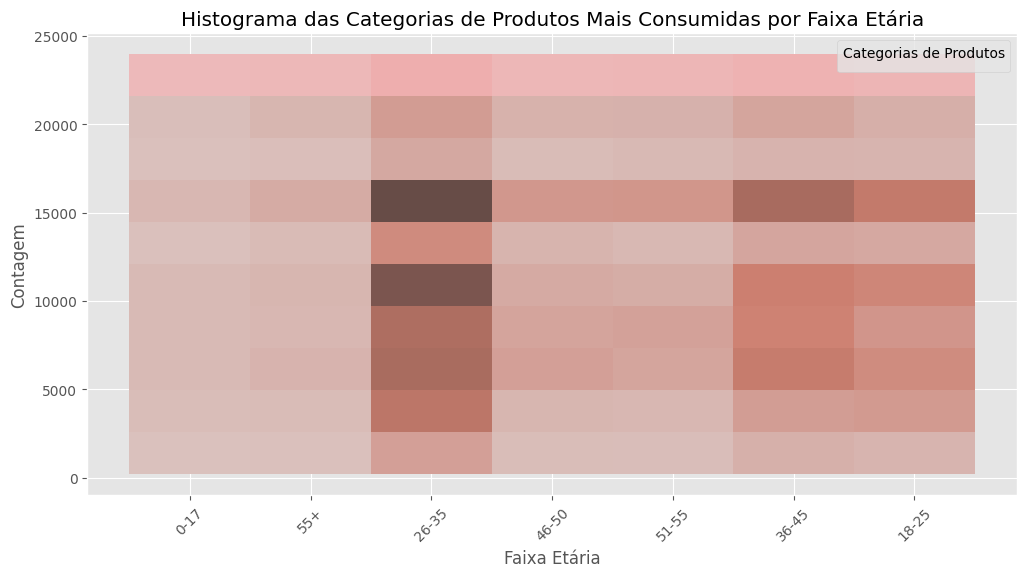

In [ ]:
# Crie um histograma das categorias de produtos mais consumidas por faixa etária
plt.figure(figsize=(12, 6))

# Defina as cores a serem usadas na legenda
cores = sns.color_palette("tab10")

sns.histplot(data=data, x='Age', y='Purchase', hue='Product_Category_1', bins=10, palette=cores[:len(data['Product_Category_1'].unique())], element='step', common_norm=False, fill=False, stat="count", legend=False)
sns.histplot(data=data, x='Age', y='Purchase', hue='Product_Category_2', bins=10, palette=cores[:len(data['Product_Category_2'].unique())], element='step', common_norm=False, fill=False, stat="count", legend=False)
sns.histplot(data=data, x='Age', y='Purchase', hue='Product_Category_3', bins=10, palette=cores[:len(data['Product_Category_3'].unique())], element='step', common_norm=False, fill=False, stat="count", legend=False)

# Personalize o gráfico
plt.title('Histograma das Categorias de Produtos Mais Consumidas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')

# Crie uma legenda personalizada
categorias = ['Categoria 1', 'Categoria 2', 'Categoria 3']
legenda = plt.legend(categorias, title='Categorias de Produtos', loc='upper right')

# Rotação dos rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()

In [ ]:
 0   User_ID                     537577 non-null  int64
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64
 8   Product_Category_1          537577 non-null  int64
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



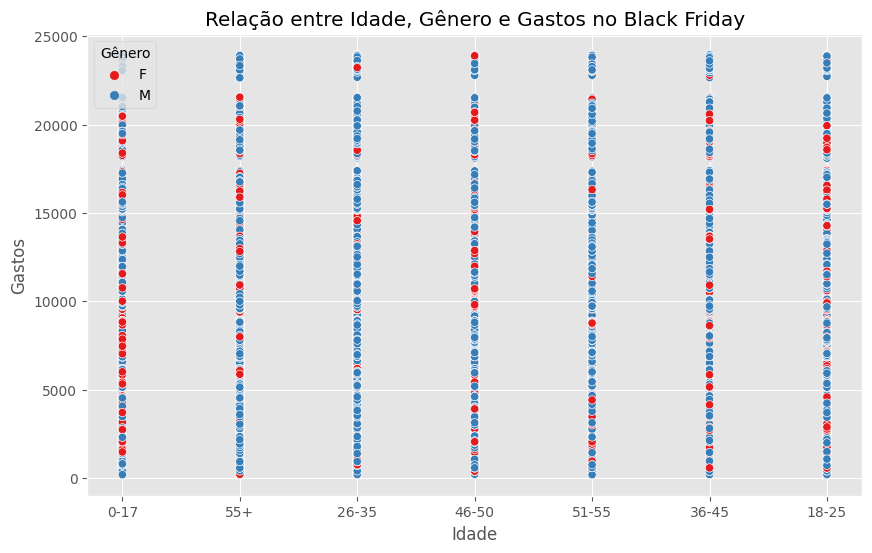

In [ ]:
# Crie um gráfico de dispersão usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Purchase', hue='Gender', palette='Set1')

# Personalize o gráfico
plt.title('Relação entre Idade, Gênero e Gastos no Black Friday')
plt.xlabel('Idade')
plt.ylabel('Gastos')
plt.legend(title='Gênero')

# Exiba o gráfico
plt.show()

In [ ]:
# Separação dos dados em dois DataFrames, um para cada gênero
df_female = data[data['Gender'] == 'F']
df_male = data[data['Gender'] == 'M']

In [ ]:
df_female.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,8,14,5378
15,1000006,P00190242,F,51-55,9,A,1,0,4,5,0,2079
16,1000006,P0096642,F,51-55,9,A,1,0,2,3,4,13055
17,1000006,P00058442,F,51-55,9,A,1,0,5,14,0,8851
29,1000010,P00085942,F,36-45,1,B,4+,1,2,4,8,16352
30,1000010,P00118742,F,36-45,1,B,4+,1,5,11,0,8886


In [ ]:
# Crie uma tabela de frequência dos valores de 'Product_ID' no DataFrame df_female
tabela_de_frequencia = df_female['Product_ID'].value_counts().reset_index()
tabela_de_frequencia.columns = ['Product_ID', 'Frequencia']

# Exiba a tabela de frequência
#print(tabela_de_frequencia)
tabela_de_frequencia.head(10)

,Product_ID,Frequencia
0,P00265242,505
1,P00220442,427
2,P00058042,378
3,P00255842,366
4,P00034742,358
5,P00110742,357
6,P00110842,351
7,P00059442,350
8,P00117442,346
9,P00000142,342


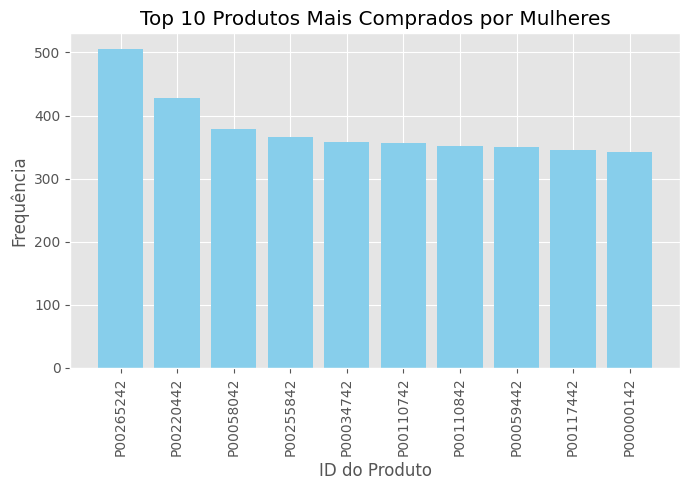

In [ ]:
# Ordene a tabela de frequência pelos valores da coluna 'Frequencia' em ordem decrescente e pegue os 10 primeiros produtos
top_10_produtos = tabela_de_frequencia.nlargest(10, 'Frequencia')

# Crie um gráfico de barras
plt.figure(figsize=(7, 5))  # Tamanho do gráfico

# Defina os valores do eixo x (Product_ID) e do eixo y (Frequencia) para os 10 produtos mais comprados
x = top_10_produtos['Product_ID']
y = top_10_produtos['Frequencia']

plt.bar(x, y, color='skyblue')  # Crie um gráfico de barras

# Personalize o gráfico
plt.xlabel('ID do Produto')
plt.ylabel('Frequência')
plt.title('Top 10 Produtos Mais Comprados por Mulheres')
plt.xticks(rotation=90)  # Rotacione os rótulos no eixo x para melhor legibilidade

# Exiba o gráfico
plt.tight_layout()  # Ajuste o layout para evitar cortes
plt.show()

In [ ]:
df_male.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2,0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0,0,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11,0,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,0,0,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,0,0,6073
13,1000005,P00145042,M,26-35,20,A,1,1,1,2,5,15665


In [ ]:
# Crie uma tabela de frequência dos valores de 'Product_ID' no DataFrame df_female
tabela_de_frequencia_masc = df_male['Product_ID'].value_counts().reset_index()
tabela_de_frequencia_masc.columns = ['Product_ID', 'Frequencia']

# Exiba a tabela de frequência
#print(tabela_de_frequencia)
tabela_de_frequencia_masc.head(10)

,Product_ID,Frequencia
0,P00265242,1353
1,P00025442,1245
2,P00110742,1234
3,P00112142,1207
4,P00057642,1174
5,P00184942,1131
6,P00046742,1116
7,P00237542,1092
8,P00145042,1086
9,P00010742,1056


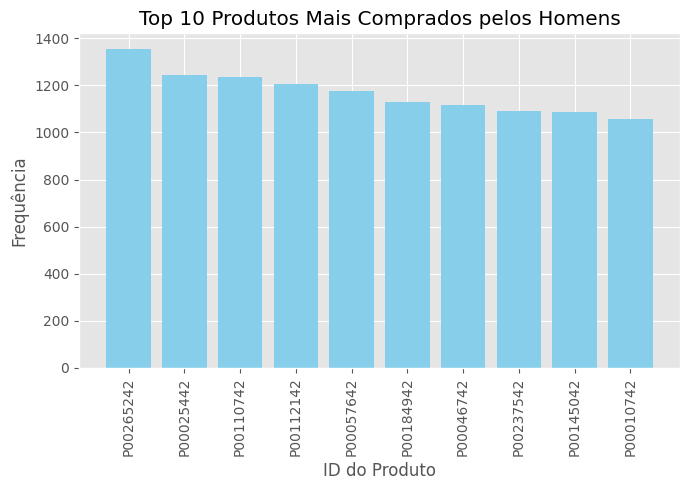

In [ ]:
# Ordene a tabela de frequência pelos valores da coluna 'Frequencia' em ordem decrescente e pegue os 10 primeiros produtos
top_10_produtos_masc = tabela_de_frequencia_masc.nlargest(10, 'Frequencia')

# Crie um gráfico de barras
plt.figure(figsize=(7, 5))  # Tamanho do gráfico

# Defina os valores do eixo x (Product_ID) e do eixo y (Frequencia) para os 10 produtos mais comprados
x = top_10_produtos_masc['Product_ID']
y = top_10_produtos_masc['Frequencia']

plt.bar(x, y, color='skyblue')  # Crie um gráfico de barras

# Personalize o gráfico
plt.xlabel('ID do Produto')
plt.ylabel('Frequência')
plt.title('Top 10 Produtos Mais Comprados pelos Homens')
plt.xticks(rotation=90)  # Rotacione os rótulos no eixo x para melhor legibilidade

# Exiba o gráfico
plt.tight_layout()  # Ajuste o layout para evitar cortes
plt.show()

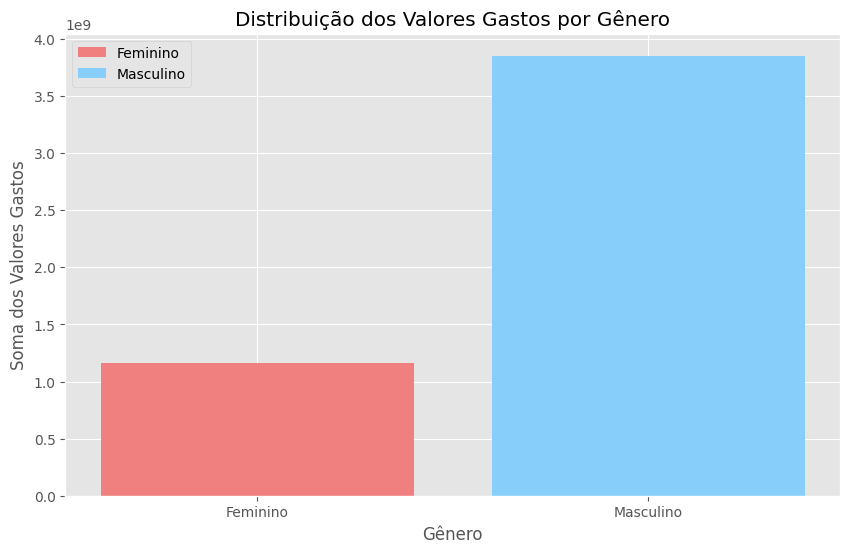

In [ ]:
# Crie gráficos de barras para cada gênero
plt.figure(figsize=(10, 6))
plt.bar('Feminino', df_female['Purchase'].sum(), color='lightcoral', label='Feminino')
plt.bar('Masculino', df_male['Purchase'].sum(), color='lightskyblue', label='Masculino')

# Adicione rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Soma dos Valores Gastos')
plt.title('Distribuição dos Valores Gastos por Gênero')
plt.legend()

# Exiba o gráfico
plt.show()

In [ ]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
data_age_purchase = data.groupby('Age')['Purchase'].mean()
data_age_purchase

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<ipython-input-44-07b6c96da44e>:5: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b-s" (-> color='b'). The keyword argument will take precedence.



Text(0.5, 1.0, 'Média de Gastos por Faixa Etária')

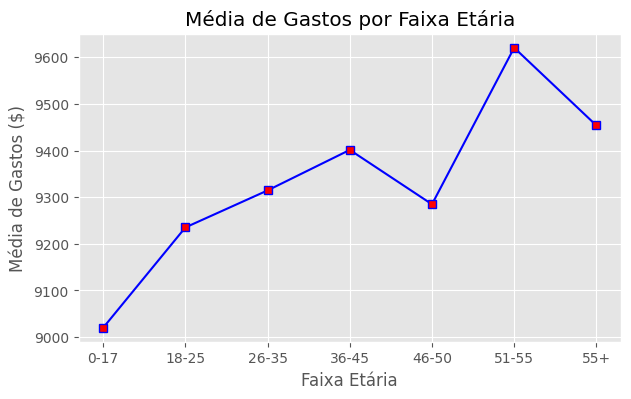

In [ ]:
#Gráfico, gastos médios por faixa etária
data_age_purchase = data.groupby('Age')['Purchase'].mean()
data_age_purchase = pd.DataFrame({'Age': data_age_purchase.index, 'Average_purchase': data_age_purchase.values})
plt.figure(figsize=(7, 4))
plt.plot('Age', 'Average_purchase', 'b-s', data=data_age_purchase, color='blue', markerfacecolor='red')
plt.grid(visible='True')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Gastos ($)')
plt.title('Média de Gastos por Faixa Etária')


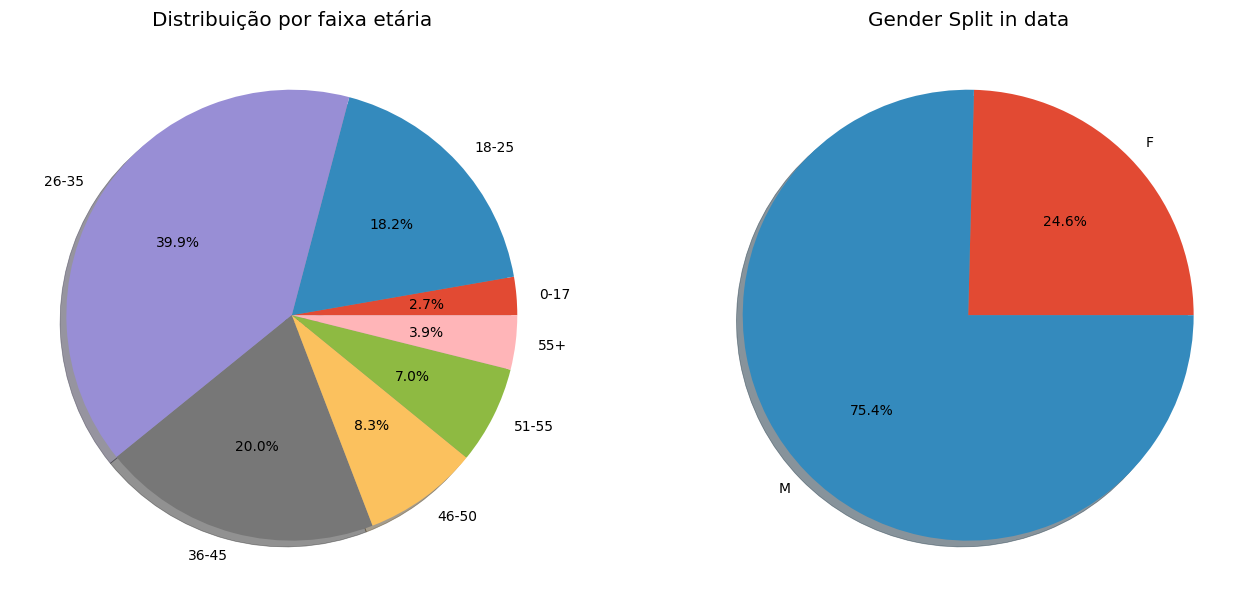

In [ ]:
#Frequencia de registros Faixa etaria e sexo
data_Age = data.groupby('Age')['Age'].count()
data_Sex = data.groupby('Gender')['Gender'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Distribuição por faixa etária');
plt.subplot(122)
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');

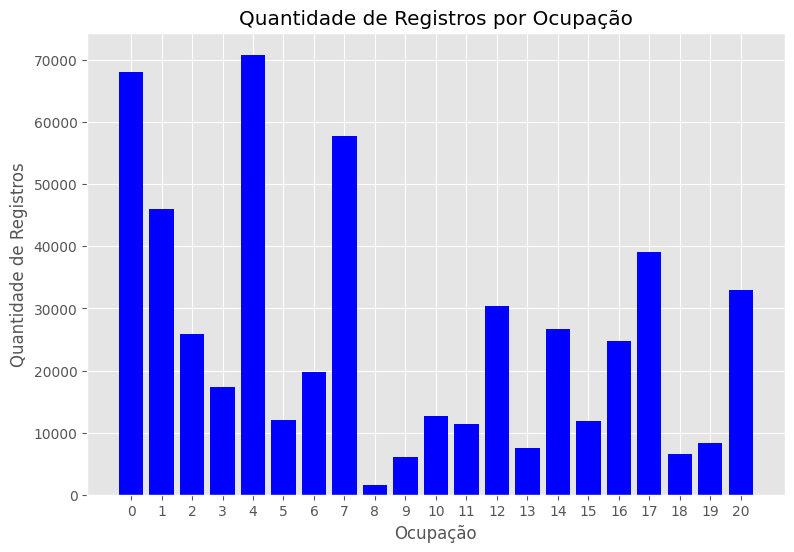

In [ ]:
data_occup = data['Occupation'].value_counts();
plt.figure(figsize = (9,6));
plt.bar(data_occup.index,data_occup.values,color ='b');
plt.xticks(data_occup.index);
plt.xlabel('Ocupação');
plt.ylabel('Quantidade de Registros');
plt.title('Quantidade de Registros por Ocupação');

    Ocupação  Quantidade
0          4       70862
1          0       68120
2          7       57806
3          1       45971
4         17       39090
5         20       32910
6         12       30423
7         14       26712
8          2       25845
9         16       24790
10         6       19822
11         3       17366
12        10       12623
13         5       11985
14        15       11812
15        11       11338
16        19        8352
17        13        7548
18        18        6525
19         9        6153
20         8        1524


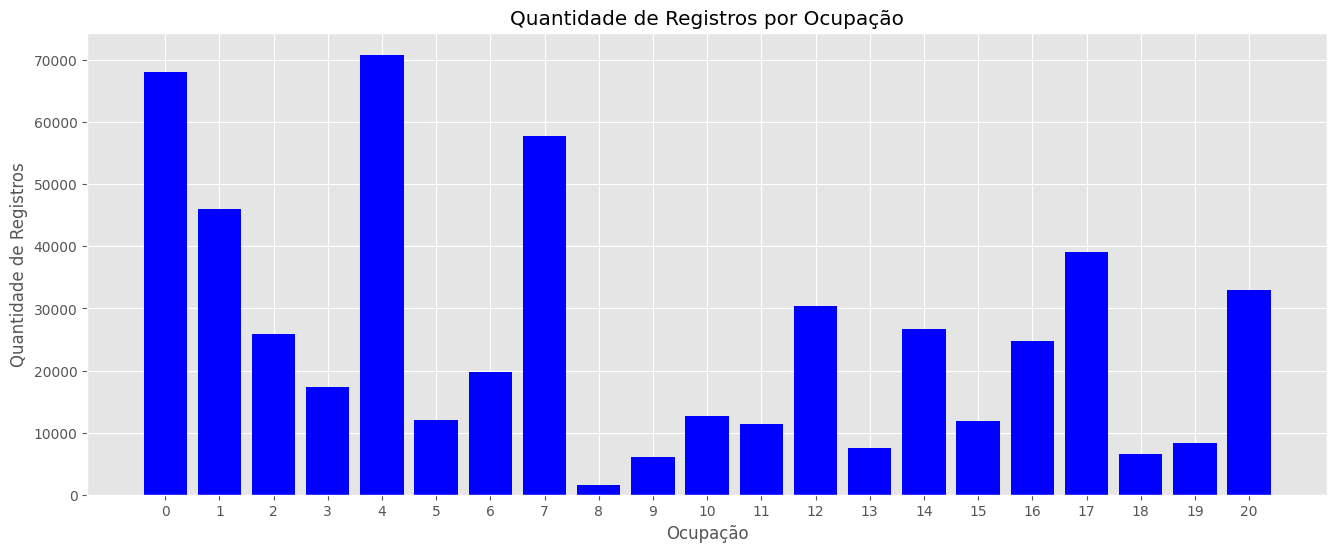

In [ ]:
data_occup = data['Occupation'].value_counts().reset_index()
data_occup.columns = ['Ocupação', 'Quantidade']
print(data_occup)

plt.figure(figsize = (16,6));
plt.bar(data_occup['Ocupação'],data_occup['Quantidade'],color ='b');
plt.xticks(data_occup.index);
plt.xlabel('Ocupação');
plt.ylabel('Quantidade de Registros');
plt.title('Quantidade de Registros por Ocupação');

# Quantidade de registros por faixa etária
# Função value_counts() para calcular a tabela de frequência
# tabela_frequencia_idade = data['Age'].value_counts().reset_index()
# tabela_frequencia_idade.columns = ['Idade', 'Frequência']
# print(tabela_frequencia_idade)

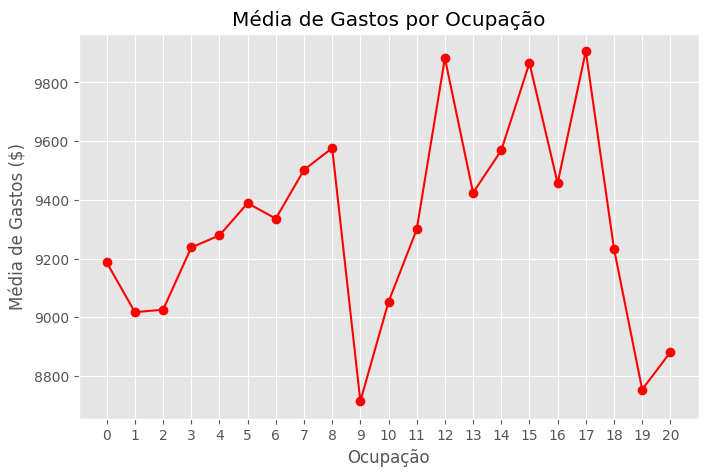

In [ ]:
data_occ_purchase = data.groupby('Occupation')['Purchase'].mean();
plt.figure(figsize=(8,5));
plt.grid(True);
plt.plot(data_occ_purchase.index,data_occ_purchase.values,'ro-');
plt.xlabel('Ocupação');
plt.ylabel('Média de Gastos ($)');
plt.title('Média de Gastos por Ocupação');
plt.xticks(data_occ_purchase.index);

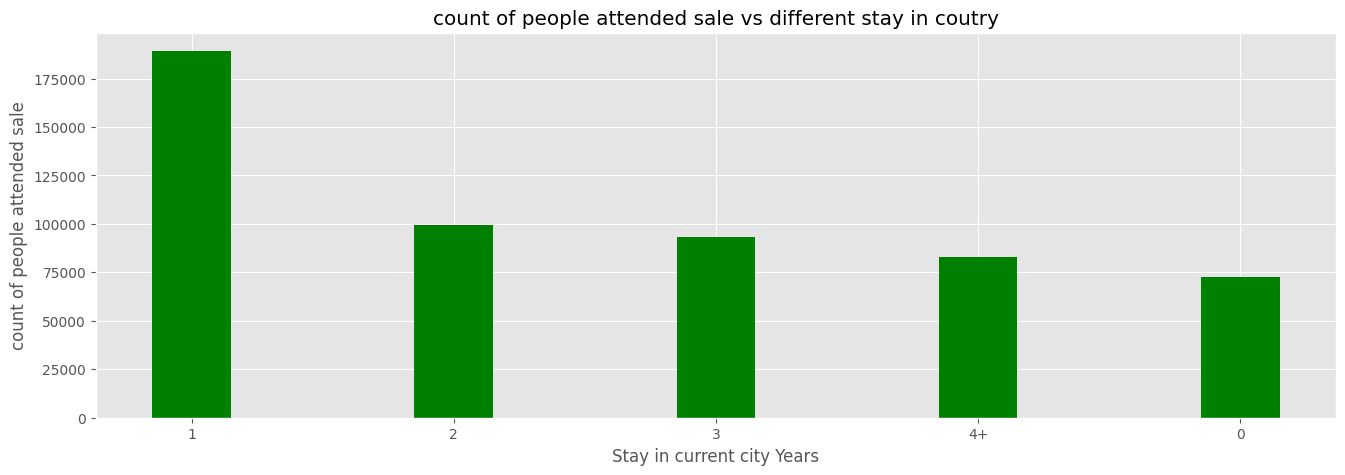

In [ ]:
#Tempo de permanêcia na cidade
data_stay_in = data['Stay_In_Current_City_Years'].value_counts();
plt.figure(figsize=(16,5));
plt.bar(data_stay_in.index,data_stay_in.values,width=0.3,color = 'green');
plt.xlabel('Stay in current city Years');
plt.ylabel('count of people attended sale');
plt.title('count of people attended sale vs different stay in coutry');

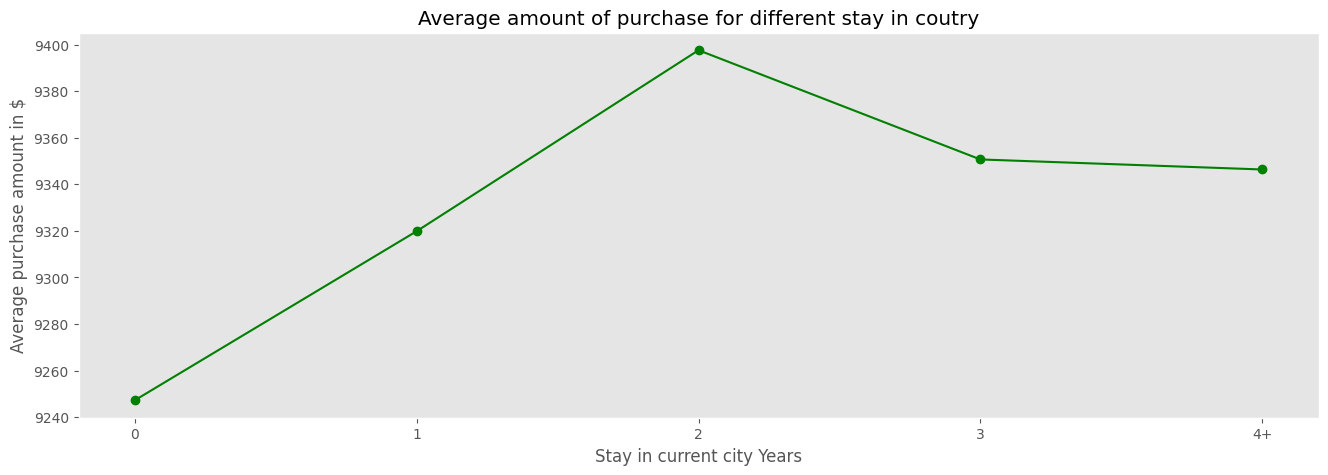

In [ ]:
data_stay_in_purchase = data.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data_stay_in_purchase.index,data_stay_in_purchase.values,'go-');
plt.xlabel('Stay in current city Years');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for different stay in coutry');

In [ ]:
data1 = data.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = data['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data3 = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left');
top_10_products = data3.sort_values(['Purchase'],ascending=False)[0:10];


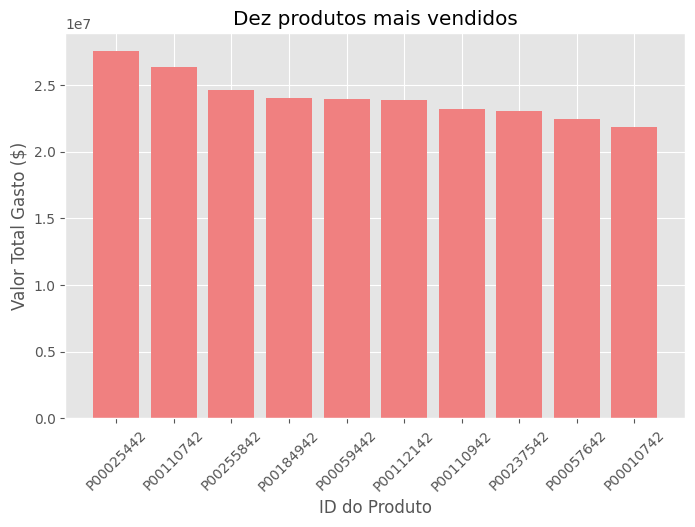

In [ ]:


# Crie o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top_10_products['Product_ID'], top_10_products['Purchase'], color='lightcoral')

# Adicione rótulos e título
plt.xlabel('ID do Produto')
plt.ylabel('Valor Total Gasto ($)')
plt.title('Dez produtos mais vendidos')

# Rotacione os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()

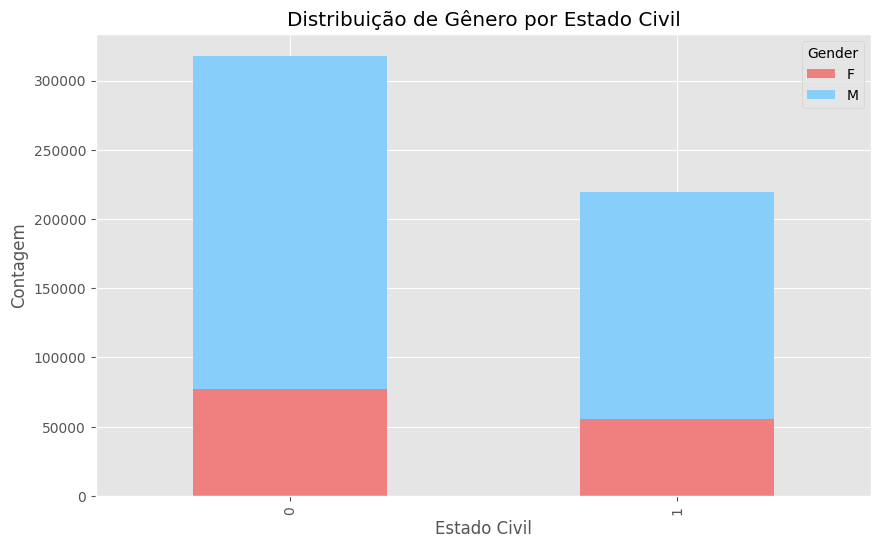

In [ ]:
# Seu código para criar o DataFrame de contagem
contagem_genero_estado_civil = data.groupby(['Marital_Status', 'Gender']).size().unstack()

# Crie um gráfico de barras empilhadas
contagem_genero_estado_civil.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'], figsize=(10, 6))

# Adicione rótulos e título
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.title('Distribuição de Gênero por Estado Civil')

# Exiba o gráfico
plt.show()

In [ ]:
# Use a função value_counts() para calcular a tabela de frequência
tabela_frequencia_idade = data['Age'].value_counts().reset_index()
tabela_frequencia_idade

,index,Age
0,26-35,214690
1,36-45,107499
2,18-25,97634
3,46-50,44526
4,51-55,37618
5,55+,20903
6,0-17,14707


In [ ]:
# Agrupe 'Product_ID' por 'Age' (faixa etária)
grupo_faixa_etaria = data.groupby(['Age', 'Product_ID']).size().unstack(fill_value=0)
grupo_faixa_etaria

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
Age,,,,,,,,,,,,,,,,,,,,,
0-17,55,19,11,2,9,10,8,4,1,26,...,0,5,0,8,7,4,0,15,1,0
18-25,256,86,48,18,33,114,35,15,19,123,...,5,32,0,81,120,56,2,32,13,3
26-35,436,130,93,46,55,225,98,5,20,202,...,18,54,5,117,245,93,6,39,23,2
36-45,221,78,35,17,32,93,47,8,11,78,...,6,27,1,25,47,25,3,26,26,2
46-50,81,25,13,4,7,29,20,1,3,23,...,3,12,0,11,7,10,0,10,15,0
51-55,56,26,23,3,9,28,17,2,0,32,...,0,5,1,8,5,3,1,1,14,4
55+,25,7,15,2,1,13,13,1,0,10,...,1,6,0,5,4,5,1,0,8,2


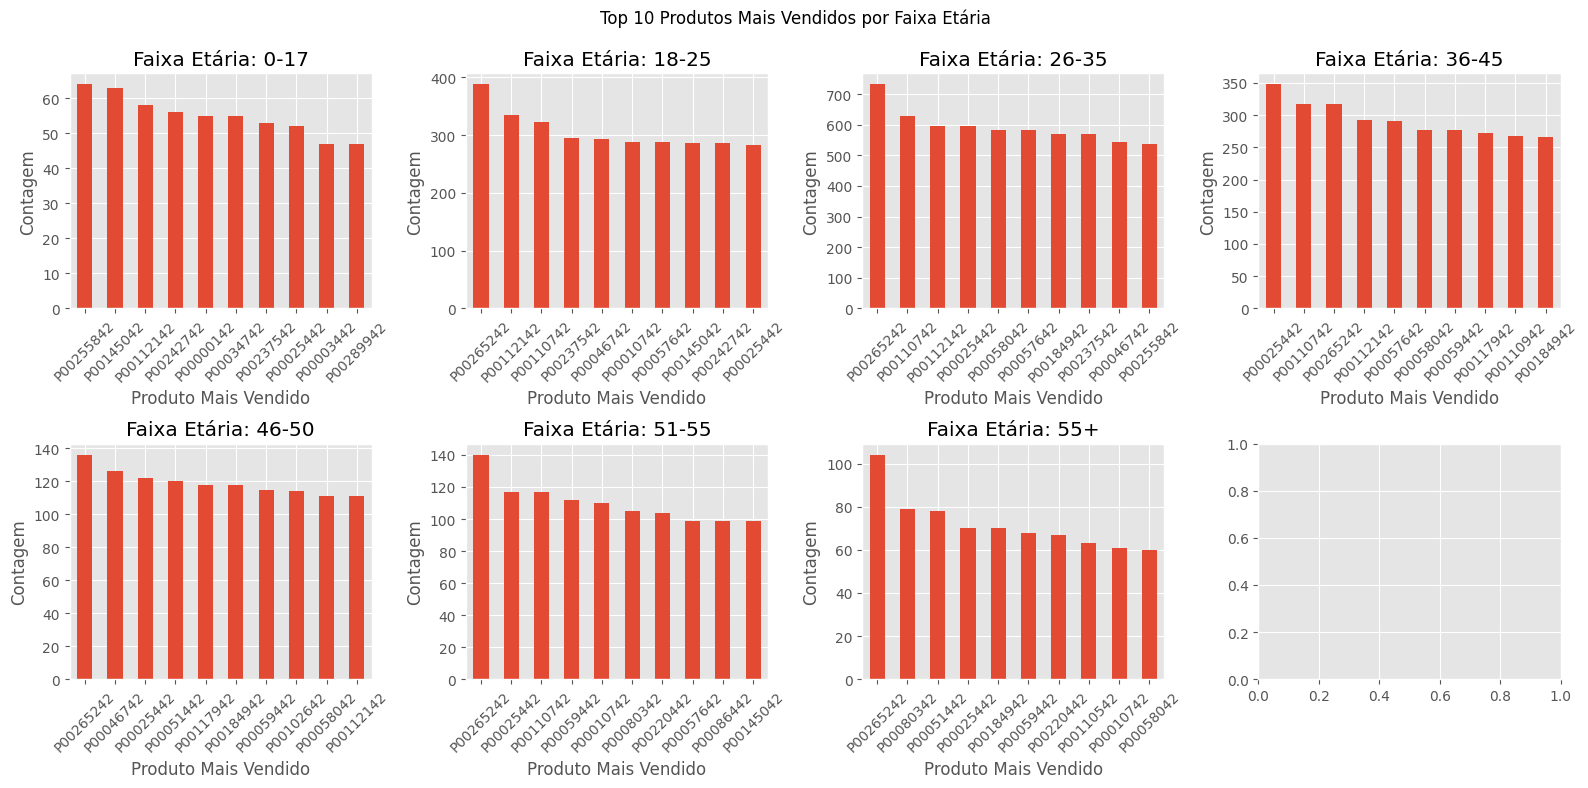

In [ ]:
# Calcule a contagem total de produtos vendidos em cada faixa etária
contagem_total_faixa_etaria = grupo_faixa_etaria.sum()

# Identifique os 10 produtos mais vendidos em cada faixa etária
produtos_mais_vendidos_por_faixa_etaria = {}
for faixa_etaria in grupo_faixa_etaria.index:
    top_10 = grupo_faixa_etaria.loc[faixa_etaria].nlargest(10)
    produtos_mais_vendidos_por_faixa_etaria[faixa_etaria] = top_10

# Crie um gráfico de barras para representar os produtos mais vendidos em cada faixa etária
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Top 10 Produtos Mais Vendidos por Faixa Etária')

for i, (faixa_etaria, produtos_mais_vendidos) in enumerate(produtos_mais_vendidos_por_faixa_etaria.items()):
    ax = axes[i // 4, i % 4]
    produtos_mais_vendidos.plot(kind='bar', ax=ax)
    ax.set_title(f'Faixa Etária: {faixa_etaria}')
    ax.set_xlabel('Produto Mais Vendido')
    ax.set_ylabel('Contagem')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
data1 = data.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = data['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data_merge = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left');
data_merge = data.sort_values(['Purchase'],ascending=False)[0:10];

In [ ]:
data_merge

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15,0,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15,0,23961
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15,0,23961
349658,1005848,P00119342,M,51-55,20,A,0,1,10,13,0,23960
503697,1005596,P00117642,M,36-45,12,B,1,0,10,16,0,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,15,0,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,15,0,23960
437804,1001387,P00086242,F,51-55,13,B,1,1,10,0,0,23959
298378,1003947,P00116142,M,26-35,0,C,3,0,10,13,16,23959
373300,1003511,P00085342,M,51-55,0,C,2,1,10,13,0,23958


In [ ]:
data4 = data.groupby(['Gender','Marital_Status'])['Gender'].count();
plt.figure(figsize=(16,16));
plt.subplot(211)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True);
plt.title('Plot of split of gender and marital status in the data');
data4 = data.groupby(['Gender','Marital_Status'])['Purchase'].mean()
data4.unstack(level=1).plot(kind='bar');

In [ ]:
data1 = data.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
data1

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


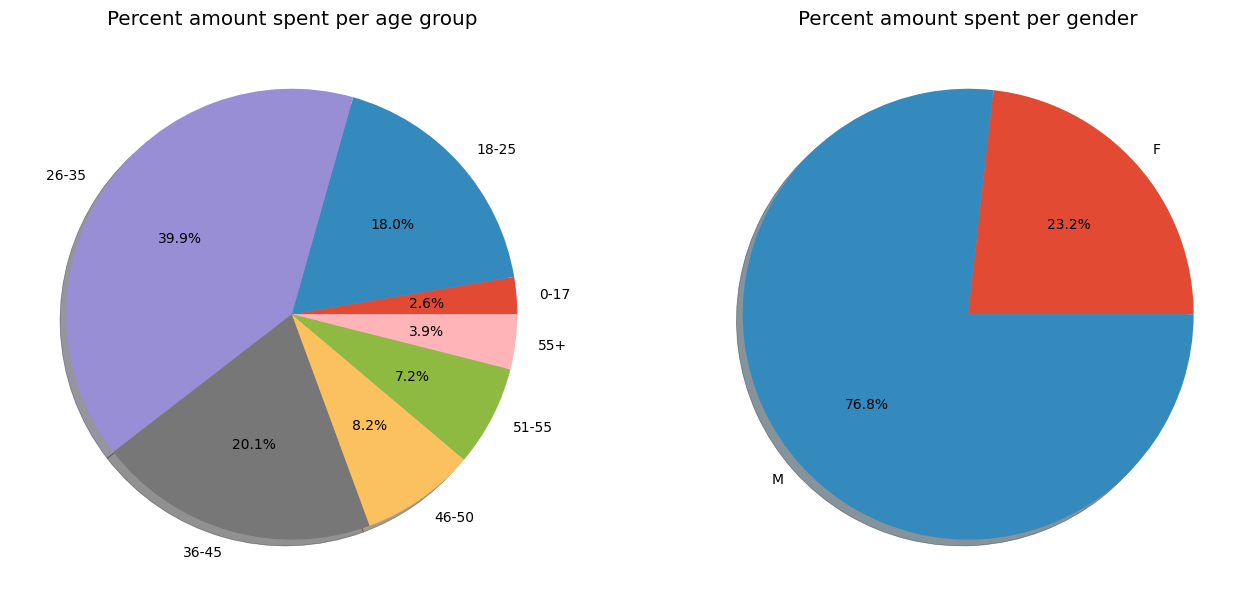

In [ ]:
data6 = data.groupby('Age')['Purchase'].sum()
data_Sex = data.groupby('Gender')['Purchase'].sum()
plt.figure(figsize=(16,16));
plt.subplot(121)
plt.pie(data6.values,labels = data6.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per age group');
plt.subplot(122)
plt.pie(data_Sex.values,labels = data_Sex.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per gender');

<ipython-input-62-736a7ece0583>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



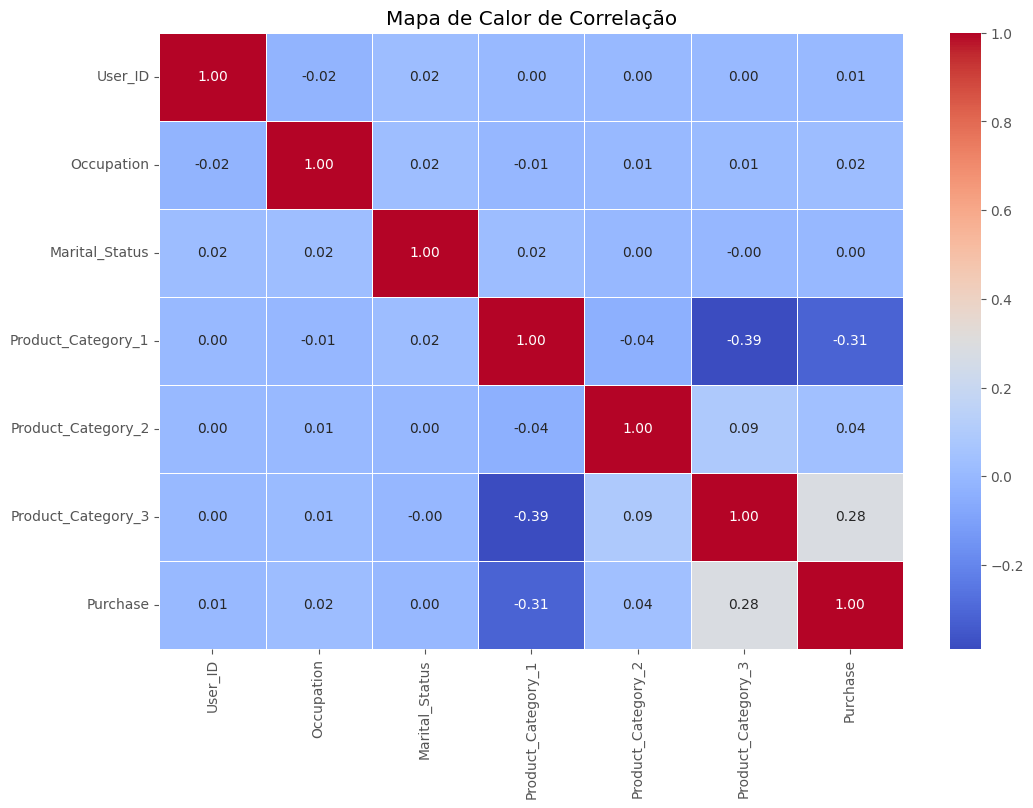

In [ ]:
import seaborn as sns

# Calcula a matriz de correlação
correlation_matrix = data.corr()

# Cria um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlação")
plt.show()


In [ ]:
#somar os purchase de cada User_id


# Agrupe os dados por User_ID e calcule a soma das compras (Purchase) para cada User_ID
soma_compras_por_usuario = data.groupby('User_ID')['Purchase'].sum()

# Encontre o User_ID que gastou mais
usuario_mais_gastador = soma_compras_por_usuario.idxmax()
total_gasto_pelo_usuario_mais_gastador = soma_compras_por_usuario.max()

print(f"O User_ID mais gastador é {usuario_mais_gastador} com um total de compras de {total_gasto_pelo_usuario_mais_gastador}")

O User_ID mais gastador é 1004277 com um total de compras de 10536783


In [ ]:
# Agrupe os dados por User_ID e calcule a soma das compras (Purchase) para cada User_ID
soma_compras_por_usuario = data.groupby('User_ID')['Purchase'].sum()

# Classifique em ordem decrescente e selecione os 10 primeiros
top_10_usuarios = soma_compras_por_usuario.sort_values(ascending=False).head(10)

# Exiba os 10 usuários que mais gastaram
print(top_10_usuarios)

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
1004448     6565878
1001015     6511302
1003391     6476786
1001181     6387899
1000549     6310604
Name: Purchase, dtype: int64


In [ ]:
# Localize o User_ID 1004277
usuario = data.loc[data['User_ID'] == 1001680]

# Exiba as informações do usuário
#print(usuario)

usuario.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
11055,1001680,P00036742,M,26-35,20,A,3,1,1,16,0,15670
11056,1001680,P00130642,M,26-35,20,A,3,1,11,16,0,6139
11057,1001680,P00105442,M,26-35,20,A,3,1,11,0,0,7607
11058,1001680,P00245642,M,26-35,20,A,3,1,5,11,12,8715
11059,1001680,P00123342,M,26-35,20,A,3,1,11,0,0,4472
11060,1001680,P00280442,M,26-35,20,A,3,1,11,0,0,7378
11061,1001680,P00269242,M,26-35,20,A,3,1,11,13,0,5965
11062,1001680,P00180442,M,26-35,20,A,3,1,11,0,0,7630
11063,1001680,P00049942,M,26-35,20,A,3,1,11,15,0,4705
11064,1001680,P00359342,M,26-35,20,A,3,1,11,0,0,7521


<ipython-input-69-f3d062d8b6c8>:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



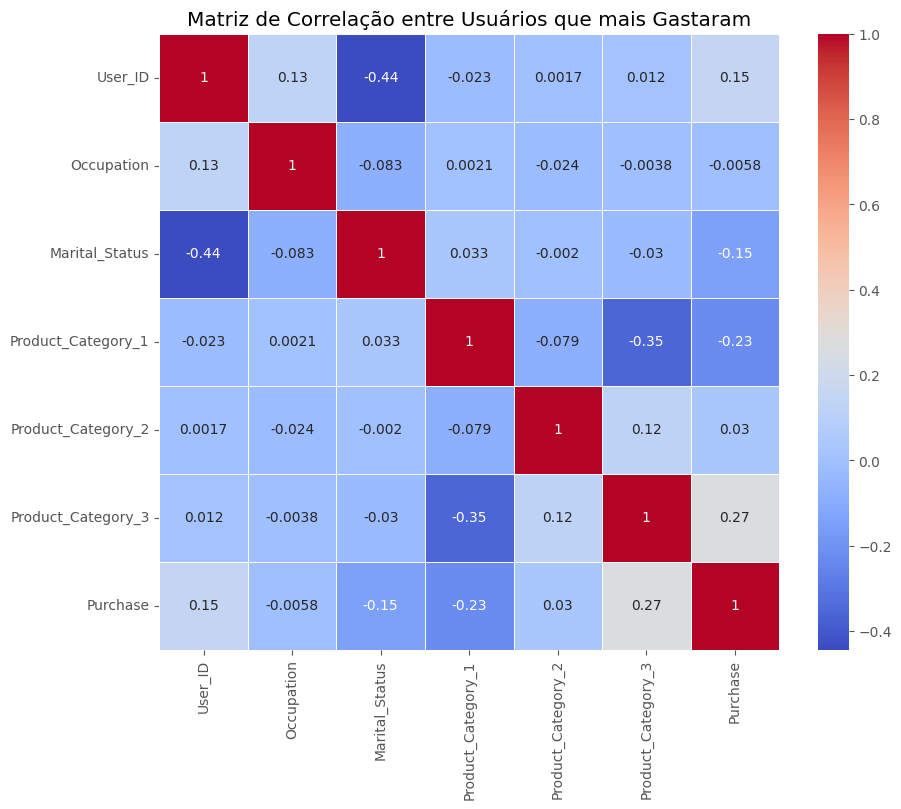

In [ ]:
# Agrupe os dados por User_ID e calcule a soma das compras (Purchase) para cada User_ID
soma_compras_por_usuario = data.groupby('User_ID')['Purchase'].sum()

# Selecione os 10 principais usuários que mais gastaram
top_10_usuarios = soma_compras_por_usuario.sort_values(ascending=False).head(10)

# Filtrar o DataFrame original para incluir apenas as compras desses 10 usuários
dados_top_10 = data[data['User_ID'].isin(top_10_usuarios.index)]

# Calcular a matriz de correlação
matriz_correlacao = dados_top_10.corr()

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=.5)

# Personalize o gráfico
plt.title('Matriz de Correlação entre Usuários que mais Gastaram')
plt.show()